In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

# we import funcanimation from the matplotlib library
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap, TwoSlopeNorm
from IPython.display import HTML

In [4]:
def get_daily_returns(returns_df):
    daily_returns = returns_df.copy()
    # for each row we calculate how many days since date of previous row
    daily_returns['days_since'] = daily_returns['Date'].diff().dt.days
    # we calculate the daily return by undoing the cumulative product
    # for each row after the first one, we calculate the daily return as the nth root of the cumulative (1 + return) product
    daily_returns['gross_return'] = daily_returns['Close'] / daily_returns['Close'].shift(1)
    daily_returns['daily_return'] = daily_returns['gross_return'] ** (1 / daily_returns['days_since'])-1
    # we check if the daily return is correct by calculating the cumulative product doing (1 + daily_return	) ** days_since
    # daily_returns['gross_check'] = ( daily_returns['daily_return']) ** daily_returns['days_since']
    # we fill the first row with 1
    # daily_returns['daily_return'].iloc[0] = 1
    
    # return daily_returns
    return daily_returns['daily_return'].to_list()


# get_daily_returns(merged_df[['Date','spy_close']]).head()
# print(get_daily_returns(merged_df[['Date','spy_close']]))
    

    

In [5]:
# we download daily price data from yahoo finance
# we use the adjusted close price

# we download the data for the following tickers
# we use the following tickers SPY

import yfinance as yf

# we download the data for the following tickers: SPY

spy = yf.Ticker("SPY")
spy_df = spy.history(period="max")
spy_df = spy_df.reset_index()
spy_df = spy_df[["Date", "Close"]]

# spy_df.head()


# we get the daily returns
spy_df["spy_daily_return"] = get_daily_returns(spy_df)
# spy_df = spy_df.dropna()
# spy_df['spy_daily_log_return'] = np.log(spy_df["spy_daily_return"] )
spy_df['spy_daily_log1_return'] = np.log1p(spy_df["spy_daily_return"] )

# # we plot the daily returns
# spy_df.plot(x="Date", y="daily_log_return", title="SPY Daily Log Returns", figsize=(12, 8), alpha=0.5)
# # we overlay the daily returns in red
# spy_df.plot(x="Date", y="daily_return", title="SPY Daily Returns", figsize=(12, 8), color="red", alpha=0.5)
# plot the daily returns and the daily log returns on the same plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=spy_df["Date"], y=spy_df["spy_daily_return"], mode='lines', name='daily_return'))    
# fig.add_trace(go.Scatter(x=spy_df["Date"], y=spy_df["spy_daily_log_return"], mode='lines', name='daily_log_return'))
fig.add_trace(go.Scatter(x=spy_df["Date"], y=spy_df["spy_daily_log1_return"], mode='lines', name='daily_log1_return'))
fig.update_layout(title="SPY Daily Returns and Log Returns", xaxis_title="Date", yaxis_title="Returns")
fig.show()



c:\Github\repos\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [6]:
# we turn the datetime Date column into simple date
spy_df["Date"] = spy_df["Date"].dt.date
spy_df.head()

,Date,Close,spy_daily_return,spy_daily_log1_return
0,1993-01-29,24.840694,NaN,NaN
1,1993-02-01,25.017359,0.002365,0.002362
2,1993-02-02,25.070351,0.002118,0.002116
3,1993-02-03,25.335382,0.010572,0.010516
4,1993-02-04,25.441383,0.004184,0.004175


c:\Github\repos\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.



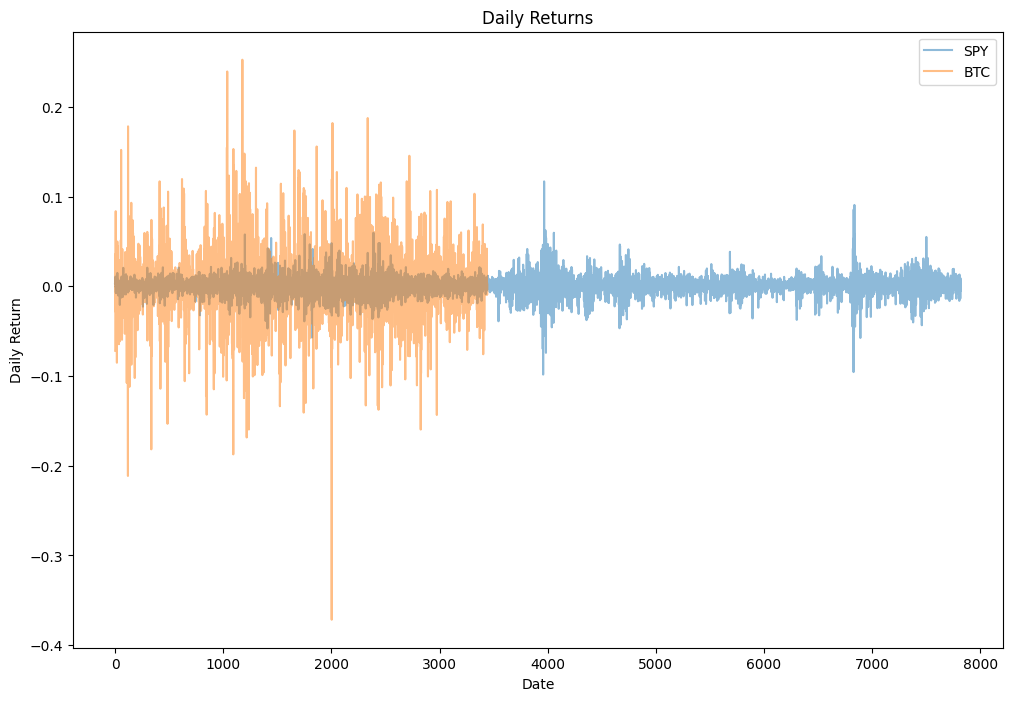

In [7]:
# we get BTC price data from yahoo finance
btc = yf.Ticker("BTC-USD")
btc_df_source = btc.history(period="max")
btc_df_source = btc_df_source.reset_index()
btc_df_source = btc_df_source[["Date", "Close"]]
# btc_df_source.head()
# we get the daily returns
# btc_df_source["btc_daily_return"] = btc_df_source["Close"].pct_change()
btc_df_source["btc_daily_return"] = get_daily_returns(btc_df_source)
# btc_df_source['btc_daily_log_return'] = np.log(btc_df_source["btc_daily_return"])
btc_df_source['btc_daily_log1_return'] = np.log1p(btc_df_source["btc_daily_return"])

# we plot the daily returns of BTC next to the daily returns of SPY on same plot red and blue
spy_df["spy_daily_return"].plot(figsize=(12, 8), label="SPY", alpha=0.5)
btc_df_source["btc_daily_return"].plot(figsize=(12, 8), label="BTC", alpha=0.5)
plt.legend()
# we add title and axis labels
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

In [8]:
# we convert Date column to date
# btc_df_source["Date"] = pd.to_datetime(btc_df_source["Date"])
spy_df.head(10)


,Date,Close,spy_daily_return,spy_daily_log1_return
0,1993-01-29,24.840694,NaN,NaN
1,1993-02-01,25.017359,0.002365,0.002362
2,1993-02-02,25.070351,0.002118,0.002116
3,1993-02-03,25.335382,0.010572,0.010516
4,1993-02-04,25.441383,0.004184,0.004175
5,1993-02-05,25.423710,-0.000695,-0.000695
6,1993-02-08,25.423710,0.000000,0.000000
7,1993-02-09,25.247044,-0.006949,-0.006973
8,1993-02-10,25.282372,0.001399,0.001398
9,1993-02-11,25.406052,0.004892,0.004880


In [9]:
# we turn the datetime Date column into simple date
btc_df_source["Date"] = btc_df_source["Date"].dt.date
btc_df_source.head(10)

,Date,Close,btc_daily_return,btc_daily_log1_return
0,2014-09-17,457.334015,NaN,NaN
1,2014-09-18,424.440002,-0.071926,-0.074643
2,2014-09-19,394.795990,-0.069843,-0.072402
3,2014-09-20,408.903992,0.035735,0.035111
4,2014-09-21,398.821014,-0.024659,-0.024968
5,2014-09-22,402.152008,0.008352,0.008317
6,2014-09-23,435.790985,0.083647,0.080333
7,2014-09-24,423.204987,-0.028881,-0.029306
8,2014-09-25,411.574005,-0.027483,-0.027868
9,2014-09-26,404.424988,-0.017370,-0.017523


In [10]:
# we merge the two dataframes on the date column
# we make both date columns date only
# spy_df["Date"] = spy_df["Date"].dt.date
# btc_df_source["Date"] = btc_df_source["Date"].dt.date

merged_df = pd.merge(spy_df, btc_df_source, on="Date", how="outer")
# we drop the na values
# merged_df = merged_df.dropna()
# we only keep the daily returns columns
# merged_df = merged_df[["Date", "spy_daily_return", "btc_daily_return"]]
# we rename the columns Close_x and Close_y to spy_close and btc_close
merged_df = merged_df.rename(columns={"Close_x": "spy_close", "Close_y": "btc_close"})
merged_df.tail(10)

,Date,spy_close,spy_daily_return,spy_daily_log1_return,btc_close,btc_daily_return,btc_daily_log1_return
8880,2024-02-09,501.200012,0.005779,0.005763,47147.199219,0.040741,0.039933
8881,2024-02-10,NaN,NaN,NaN,47771.277344,0.013237,0.013150
8882,2024-02-11,NaN,NaN,NaN,48293.917969,0.010940,0.010881
8883,2024-02-12,500.980011,-0.000146,-0.000146,49958.222656,0.034462,0.033881
8884,2024-02-13,494.079987,-0.013773,-0.013869,49742.441406,-0.004319,-0.004329
8885,2024-02-14,498.570007,0.009088,0.009047,51826.695312,0.041901,0.041047
8886,2024-02-15,502.010010,0.006900,0.006876,51938.554688,0.002158,0.002156
8887,2024-02-16,499.510010,-0.004980,-0.004992,52160.203125,0.004268,0.004258
8888,2024-02-17,NaN,NaN,NaN,51662.996094,-0.009532,-0.009578
8889,2024-02-18,NaN,NaN,NaN,51760.585938,0.001889,0.001887


In [11]:
def get_pdf(data, bins, min_x=-0.4, max_x=0.4):
    # print(data)
    bin_edges = np.linspace(min_x, max_x, bins + 1)  # bins + 1 because np.linspace includes both ends
    clipped_data = np.clip(data, min_x, max_x)  # Clip the data to the range
    counts, _ = np.histogram(clipped_data, bins=bin_edges, density=True)  # Use density=True for PDF

    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    bin_width = bin_edges[1] - bin_edges[0]  # Width of each bin
    # we normalize the counts
    counts = counts / counts.sum()



    # # we make the first count element = swan_frequency
    # if swan_frequency > 0:
    #             # we locate the bin_edges that are closest to the swan_size
    #     swan_bin = np.argmin(np.abs(bin_centers - (swan_size)))
    #     print('closest bin center to swan_size:', bin_centers[swan_bin])
    #     counts[swan_bin] = swan_frequency
    
    # counts = counts / counts.sum()

    return bin_centers, counts, bin_width

def find_month_starts(df, num_months=24):
    end_date = df['Date'].max()
    start_date = end_date - pd.DateOffset(months=num_months)
    month_starts = pd.date_range(start=start_date, end=end_date, freq='MS')
    # make sure the date is a datetime and not a timestamp
    month_starts = month_starts.to_pydatetime()
    # print(month_starts)
    return month_starts

def percentage_formatter(x, pos):
    return '{:0.0f}%'.format(x*100)

In [12]:
# we try the new method of calculating annual returns using the daily returns and a monter carlo simulation

def generate_random_daily_returns_from_pdf(bin_centers, bin_counts, size=(500, 252)):
    # print('bin_centers:', bin_centers)
    # print('bin_counts:', bin_counts)
    probabilities = bin_counts / np.sum(bin_counts)
    daily_returns = np.random.choice(bin_centers, size=size, p=probabilities)
    return daily_returns

def simulate_annual_returns(daily_returns):
    annual_returns = np.prod(1 + daily_returns, axis=1) - 1
    return annual_returns

def get_annual_returns_pdf(annual_returns, bins=30):
    # Calculate the histogram of annual returns
    counts, bin_edges = np.histogram(annual_returns, bins=bins, density=True)
    # Calculate bin centers from edges
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return bin_centers, counts


In [13]:
merged_df.head()

,Date,spy_close,spy_daily_return,spy_daily_log1_return,btc_close,btc_daily_return,btc_daily_log1_return
0,1993-01-29,24.840694,NaN,NaN,NaN,NaN,NaN
1,1993-02-01,25.017359,0.002365,0.002362,NaN,NaN,NaN
2,1993-02-02,25.070351,0.002118,0.002116,NaN,NaN,NaN
3,1993-02-03,25.335382,0.010572,0.010516,NaN,NaN,NaN
4,1993-02-04,25.441383,0.004184,0.004175,NaN,NaN,NaN


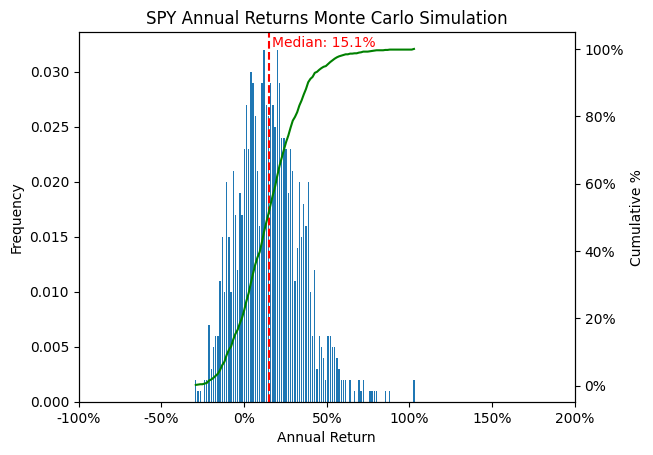

In [14]:
bins = 100
tail = 3000
montecarlo_simulations = 1000
iterations_in_a_year = 252
min_x = -1
max_x = 2



bin_centers, bin_counts, bin_width = get_pdf(merged_df['spy_daily_return'].tail(tail), bins=bins)
daily_montecarlo_returns = generate_random_daily_returns_from_pdf(bin_centers, bin_counts, size=(montecarlo_simulations, iterations_in_a_year))
annual_returns = simulate_annual_returns(daily_montecarlo_returns)
annual_returns = np.clip(annual_returns, min_x, max_x)
annual_centers, annual_counts = get_annual_returns_pdf(annual_returns, bins=bins)
# we normalize the counts
annual_counts = annual_counts / annual_counts.sum()
# we clip the annual_centers between -1 and 2


# we add the cum_pct as a plot measured on the right y-axis
fig, ax = plt.subplots()



ax.bar(annual_centers, annual_counts, width=bin_width)
ax.set_title('SPY Annual Returns Monte Carlo Simulation')
ax.set_xlabel('Annual Return')
ax.set_ylabel('Frequency')

# we add vertical bar for the 50th percentile
ax.axvline(np.percentile(annual_returns, 50), color='r', linestyle='--', label='50th percentile')
# we annotate the 50th percentile
median = np.percentile(annual_returns, 50)
ax.text(np.percentile(annual_returns, 50)*1.1, annual_counts.max(), 'Median: {:0.1%}'.format(median), rotation=0, verticalalignment='bottom', c='r')

# we calculate the cumulative percentage
cum_pct = np.cumsum(annual_counts)
# we plot the cumulative percentage
ax2 = ax.twinx()
ax2.plot(annual_centers, cum_pct, color='green', label='Cumulative %')
ax2.set_ylabel('Cumulative %')
ax2.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
# we set xlim from -1 to 5
ax.set_xlim(min_x, max_x)
# ax.set_ylim(0, bins/200) 
plt.show()


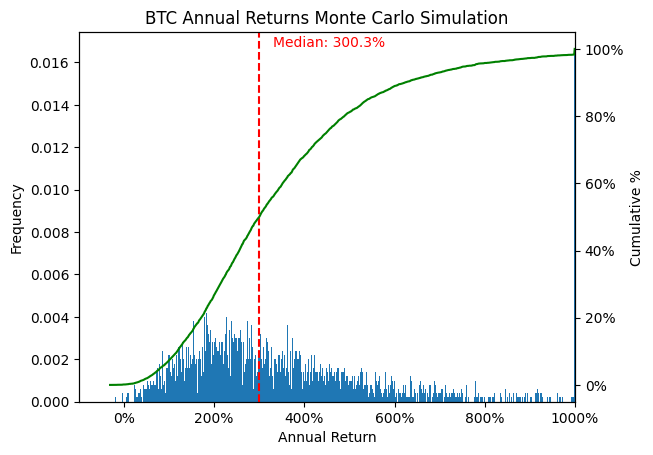

In [15]:
bins = 1000
tail = 100
montecarlo_simulations = 5000
iterations_in_a_year = 365
min_x = -1
max_x = 10

def get_stochastic_annual_median_return(merged_df, bins, tail, montecarlo_simulations, iterations_in_a_year, min_x, max_x):
    # print(merged_df.tail(tail))
    bin_centers_btc, bin_counts_btc, bin_width_btc = get_pdf(merged_df.tail(tail), bins=bins, min_x=min_x, max_x=max_x)
    daily_montecarlo_returns_btc = generate_random_daily_returns_from_pdf(bin_centers_btc, bin_counts_btc, size=(montecarlo_simulations, iterations_in_a_year))
    annual_returns_btc = simulate_annual_returns(daily_montecarlo_returns_btc)
    annual_returns_btc_clipped = np.clip(annual_returns_btc, min_x, max_x)
    annual_centers_btc, annual_counts_btc = get_annual_returns_pdf(annual_returns_btc_clipped, bins=bins)
    # we normalize the counts
    annual_counts_btc = annual_counts_btc / annual_counts_btc.sum()
    median = np.percentile(annual_returns_btc, 50)

    return median, annual_centers_btc, annual_counts_btc, bin_width_btc, annual_returns_btc
# we clip the annual_centers between -1 and 2


median, annual_centers_btc, annual_counts_btc, bin_width_btc, annual_returns_btc = get_stochastic_annual_median_return(merged_df['btc_daily_return'], bins, tail, montecarlo_simulations, iterations_in_a_year, min_x, max_x)

# we plot the annual returns
fig, ax = plt.subplots()
ax.bar(annual_centers_btc, annual_counts_btc, width=bin_width_btc)
ax.set_title('BTC Annual Returns Monte Carlo Simulation')
ax.set_xlabel('Annual Return')
ax.set_ylabel('Frequency')


# we add vertical bar for the 50th percentile
ax.axvline(np.percentile(annual_returns_btc, 50), color='r', linestyle='--', label='50th percentile')
# we annotate the 50th percentile
median = np.percentile(annual_returns_btc, 50)
ax.text(np.percentile(annual_returns_btc, 50)*1.1, annual_counts_btc.max(), 'Median: {:0.1%}'.format(median), rotation=0, verticalalignment='bottom', c='r')

# we calculate the cumulative percentage
cum_pct = np.cumsum(annual_counts_btc)
# we plot the cumulative percentage
ax2 = ax.twinx()
ax2.plot(annual_centers_btc, cum_pct, color='green', label='Cumulative %')
ax2.set_ylabel('Cumulative %')
ax2.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
# we set xlim from -1 to 5
ax.set_xlim(min_x, max_x)
plt.show()


In [16]:
merged_df.tail()

,Date,spy_close,spy_daily_return,spy_daily_log1_return,btc_close,btc_daily_return,btc_daily_log1_return
8885,2024-02-14,498.570007,0.009088,0.009047,51826.695312,0.041901,0.041047
8886,2024-02-15,502.010010,0.006900,0.006876,51938.554688,0.002158,0.002156
8887,2024-02-16,499.510010,-0.004980,-0.004992,52160.203125,0.004268,0.004258
8888,2024-02-17,NaN,NaN,NaN,51662.996094,-0.009532,-0.009578
8889,2024-02-18,NaN,NaN,NaN,51760.585938,0.001889,0.001887


In [17]:
# now we add the median annual return computed through this process to the merged_df dataframe for each row
# we add yearly return column by calculating the div between each same date from the previous year

# date = date.to_pydate()

def add_annual_stochastic_returns(date, merged_df, bins, tail, montecarlo_simulations):
    merged_df['Date'] = pd.to_datetime(merged_df['Date'])
    # merged_df_copy = merged_df[merged_df['Date'] > date]
    date = pd.to_datetime(date)
    # print('here date: ',date)
    # print('here tail: ',tail)
    # tail_date = date - pd.to_timedelta(tail, unit='D')
    # we define tail_date as the date that is tail days before date
    tail_date = date - pd.DateOffset(days=tail)
    # print('here tail_date: ', tail_date)

    # for row in merged_df[(merged_df['Date'] >= tail_date) & (merged_df['Date'] <= date)].itertuples():
    for row in merged_df[(merged_df['Date'] >= tail_date)].itertuples():

        # print(row)
        date = row.Date
        # print('row date! ',date)
        bins=1100
        min_x = -1
        max_x = 10
        # bins = 100
        median_yearly_btc, _, _,_, _ = get_stochastic_annual_median_return(merged_df[merged_df['Date']<=date]['btc_daily_return'], bins, tail, montecarlo_simulations, 365, min_x, max_x)
        # print('median_yearly_btc: ',median_yearly_btc)
        bins = 300
        min_x = -1
        max_x = 2
        median_yearly_spy, _, _,_, _ = get_stochastic_annual_median_return(merged_df[merged_df['Date']<=date]['spy_daily_return'], bins, tail, montecarlo_simulations, 252, min_x, max_x)
        # print('median_yearly_spy: ',median_yearly_spy)

        # date = row.Date
        # year_ago = date - 365 * pd.to_timedelta(1, unit='D')
        # # we look for the closest date in the past to year_ago
        # year_ago_spy = merged_df[merged_df['Date'] < year_ago]['Date'].max()
        # year_ago_btc = merged_df[merged_df['Date'] < year_ago]['Date'].max()
        # # print(date, year_ago_spy, year_ago_btc)
        
        # try:
        #     print('ninda')
        #     merged_df.loc[row.Index, 'spy_yearly_return'] = median_yearly_spy #merged_df[merged_df['Date'] == date]['spy_close'].values[0] / merged_df[merged_df['Date'] == year_ago_spy]['spy_close'].values[0]-1
        # except:
        #     print('ninu')
        #     merged_df.loc[row.Index, 'spy_yearly_return'] = np.nan

        # try:
        #     merged_df.loc[row.Index, 'btc_yearly_return'] = median_yearly_btc # merged_df[merged_df['Date'] == date]['btc_close'].values[0] / merged_df[merged_df['Date'] == year_ago_btc]['btc_close'].values[0]-1
        # except:
        #     merged_df.loc[row.Index, 'btc_yearly_return'] = np.nan
        # Update the DataFrame for the matching date
        merged_df.loc[merged_df['Date'] == date, 'spy_yearly_return'] = median_yearly_spy
        merged_df.loc[merged_df['Date'] == date, 'btc_yearly_return'] = median_yearly_btc

    
    return merged_df


bins = 100
tail = 5
montecarlo_simulations = 1000
iterations_in_a_year = 365

# we convert '2015-01-01' to a date 
# date = pd.to_datetime('2023-10-01').date()
# date = pd.to_datetime('2023-12-01').date()
date_test = pd.to_datetime('2024-01-01').date()


# add_annual_stochastic_returns(date_test, merged_df,bins,tail,montecarlo_simulations,iterations_in_a_year).tail(100)
add_annual_stochastic_returns(date_test, merged_df,bins,tail,montecarlo_simulations).to_csv('stochastic_annual_returns.csv')

In [18]:

# Define the find_nearest function
def find_nearest(all_dates, target_date):
    # Calculate the absolute difference between each date in all_dates and the target_date
    differences = [abs(date - target_date) for date in all_dates]
    # Find the index of the smallest difference
    index_nearest = differences.index(min(differences))
    return index_nearest



In [19]:
merged_df.tail()

,Date,spy_close,spy_daily_return,spy_daily_log1_return,btc_close,btc_daily_return,btc_daily_log1_return,spy_yearly_return,btc_yearly_return
8885,2024-02-14,498.570007,0.009088,0.009047,51826.695312,0.041901,0.041047,-0.722181,1895.446038
8886,2024-02-15,502.010010,0.006900,0.006876,51938.554688,0.002158,0.002156,-0.472640,895.221453
8887,2024-02-16,499.510010,-0.004980,-0.004992,52160.203125,0.004268,0.004258,-0.536062,439.012200
8888,2024-02-17,NaN,NaN,NaN,51662.996094,-0.009532,-0.009578,-0.472560,23.981269
8889,2024-02-18,NaN,NaN,NaN,51760.585938,0.001889,0.001887,0.517180,49.861345


In [20]:
merged_df.head()
merged_copy = merged_df.copy()
# we make Date into date format
merged_copy['Date'] = pd.to_datetime(merged_df['Date'])
merged_copy.tail(5)


,Date,spy_close,spy_daily_return,spy_daily_log1_return,btc_close,btc_daily_return,btc_daily_log1_return,spy_yearly_return,btc_yearly_return
8885,2024-02-14,498.570007,0.009088,0.009047,51826.695312,0.041901,0.041047,-0.722181,1895.446038
8886,2024-02-15,502.010010,0.006900,0.006876,51938.554688,0.002158,0.002156,-0.472640,895.221453
8887,2024-02-16,499.510010,-0.004980,-0.004992,52160.203125,0.004268,0.004258,-0.536062,439.012200
8888,2024-02-17,NaN,NaN,NaN,51662.996094,-0.009532,-0.009578,-0.472560,23.981269
8889,2024-02-18,NaN,NaN,NaN,51760.585938,0.001889,0.001887,0.517180,49.861345


In [21]:
def get_exp_g(merged_df, f_spy, f_btc,swan_size,swan_frequency, date, window):
    # we make sure the date is a timestamp
    date = pd.to_datetime(date)
    # print('Date 1: ', date)
    # same with the column
    merged_df['Date'] = pd.to_datetime(merged_df['Date'])
    samples_df = merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=window)) & (merged_df['Date'] <= date)]
    samples_df = samples_df[['spy_yearly_return', 'btc_yearly_return']]
    # samples_df = samples_df.dropna()
    n_samples = samples_df.shape[0]
    # print('n_samples: ', n_samples)
    weights = np.ones(n_samples) / n_samples
    # we add a row to the samples_df if swan_frequency > 0 with the swan_size and swan_frequency
    if swan_frequency > 0:
        # we prepare a new row which has the swan size for each column
        new_row = pd.DataFrame({'spy_yearly_return': swan_size, 'btc_yearly_return': swan_size}, index=[samples_df.index[-1]+1])
        samples_df = pd.concat([samples_df,new_row], ignore_index=True)
        n_samples += 1
        weights = weights * (1 - swan_frequency)
        weights = np.append(weights, swan_frequency)
    # we add the weights to the samples_df
    samples_df['weights'] = weights


    # print('swan size and frequency: ', swan_size, swan_frequency)
    # print('sum of weights: ', np.sum(weights))
    
    #  we create a column with the blend of the spy and btc returns using the f_spy and f_btc
    samples_df['portfolio_blend_return'] = f_spy * samples_df['spy_yearly_return'] + f_btc * samples_df['btc_yearly_return']
    samples_df['portfolio_blend_return_log1p'] = np.log1p(samples_df['portfolio_blend_return'])

    exp_g = np.dot(samples_df['portfolio_blend_return_log1p'], samples_df['weights'])

    # we do exp minus 1 of exp_g

    exp_g = np.expm1(exp_g)
    
    # print('Expected G: ', exp_g)

    # return samples_df # exp_g
    return exp_g #, samples_df # exp_g

# get_exp_g(merged_df, 0.7, 0.3, -1, 0.1, pd.Timestamp('2023-10-01'), 1).tail(5)

    

In [22]:
merged_df['spy_yearly_return_log1p'] = np.log1p(merged_df['spy_yearly_return'])
merged_df['btc_yearly_return_log1p'] = np.log1p(merged_df['btc_yearly_return'])
merged_df=merged_df[merged_df['Date']>'2015-01-01']
merged_df['spy_close'] = merged_df['spy_close'] *10
merged_df.head()

,Date,spy_close,spy_daily_return,spy_daily_log1_return,btc_close,btc_daily_return,btc_daily_log1_return,spy_yearly_return,btc_yearly_return,spy_yearly_return_log1p,btc_yearly_return_log1p
5555,2015-01-02,1748.067017,-0.000268,-0.000268,315.032013,0.002492,0.002489,NaN,NaN,NaN,NaN
5556,2015-01-03,NaN,NaN,NaN,281.082001,-0.107767,-0.114028,NaN,NaN,NaN,NaN
5557,2015-01-04,NaN,NaN,NaN,264.195007,-0.060079,-0.061959,NaN,NaN,NaN,NaN
5558,2015-01-05,1716.498260,-0.006056,-0.006075,274.473999,0.038907,0.038169,NaN,NaN,NaN,NaN
5559,2015-01-06,1700.330353,-0.009419,-0.009464,286.188995,0.042682,0.041796,NaN,NaN,NaN,NaN


In [23]:
merged_df['spy_close'].fillna(method='ffill', inplace=True)
merged_df['btc_close'].fillna(method='ffill', inplace=True)

C:\Users\jordi\AppData\Local\Temp\ipykernel_10792\3650335421.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\jordi\AppData\Local\Temp\ipykernel_10792\3650335421.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\jordi\AppData\Local\Temp\ipykernel_10792\3650335421.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will c

In [27]:
merged_df.tail(10)

,Date,spy_close,spy_daily_return,spy_daily_log1_return,btc_close,btc_daily_return,btc_daily_log1_return,spy_yearly_return,btc_yearly_return,spy_yearly_return_log1p,btc_yearly_return_log1p
8880,2024-02-09,5012.000122,0.005779,0.005763,47147.199219,0.040741,0.039933,1.131565,1897.862575,0.756856,7.549010
8881,2024-02-10,5012.000122,NaN,NaN,47771.277344,0.013237,0.013150,2.514371,3899.418733,1.256860,8.268839
8882,2024-02-11,5012.000122,NaN,NaN,48293.917969,0.010940,0.010881,2.514371,8041.675648,1.256860,8.992517
8883,2024-02-12,5009.800110,-0.000146,-0.000146,49958.222656,0.034462,0.033881,0.517180,16173.305802,0.416853,9.691179
8884,2024-02-13,4940.799866,-0.013773,-0.013869,49742.441406,-0.004319,-0.004329,-0.719828,1899.174678,-1.272353,7.549701
8885,2024-02-14,4985.700073,0.009088,0.009047,51826.695312,0.041901,0.041047,-0.719573,1868.846222,-1.271444,7.533611
8886,2024-02-15,5020.100098,0.006900,0.006876,51938.554688,0.002158,0.002156,-0.472481,913.552266,-0.639570,6.818435
8887,2024-02-16,4995.100098,-0.004980,-0.004992,52160.203125,0.004268,0.004258,-0.531660,435.052999,-0.758560,6.077764
8888,2024-02-17,4995.100098,NaN,NaN,51662.996094,-0.009532,-0.009578,-0.472294,23.744707,-0.639216,3.208612
8889,2024-02-18,4995.100098,NaN,NaN,51760.230469,0.001882,0.001880,0.517180,50.297740,0.416853,3.937647


In [26]:
# we try to fix the matrix calculation, to make the sum inside the log1p


# we manually inject a catastrophic event in the spy returns and the btc returns
# we hide warnings
import warnings
warnings.filterwarnings('ignore')


def update8(date, merged_df_annualized, month_starts, min_x=-0.4, max_x=0.4, y_max=1, bins=50, swan_size=0, swan_frequency=0, resolution = 10):
        # Ensure the 'Date' column is in datetime format
    merged_df['Date'] = pd.to_datetime(merged_df['Date'])

    # Convert 'date' to pandas.Timestamp
    # Assuming 'date' is defined, convert it like this
    date = pd.to_datetime(date)
    print('======  ENTERING CHART LOOP =========')
    print('date: ', date)

    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    ax5.clear()
    ax6.clear()
    ax7.clear()
    ax8.clear()
    ax9.clear()


    # ax1.set_yscale('log')
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')
    # ax4.set_xscale('log')
    # ax2.set_xscale('log')

    month_data_spy = merged_df[(merged_df_annualized['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df_annualized['Date'] < date)]['spy_yearly_return']
    month_data_spy_log = merged_df[(merged_df_annualized['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df_annualized['Date'] < date)]['spy_yearly_return_log1p']

    if not month_data_spy.empty:
        bin_centers_spy_0, counts_spy_0, bin_width_spy = get_pdf(month_data_spy, bins, min_x, max_x)

        bin_centers_spy = bin_centers_spy_0.tolist()
        counts_spy = counts_spy_0.tolist()
        if swan_frequency > 0:
            # swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_spy.append((swan_size))
            counts_spy.append(swan_frequency)
            # we normalize the array_2
            counts_spy = np.array(counts_spy) / np.sum(counts_spy)



        # we annualize the returns
        # bin_centers_spy = np.log1p(bin_centers_spy)
        ax1.bar(bin_centers_spy, counts_spy, width=bin_width_spy, align='center')  # align='center' to center the bars
        ax1.set_title(f"SPY PDF trailing {offset_months} months")
        ax1.set_xlim(min_x, max_x)
        ax1.set_ylim(0.001, y_max)
        ax1.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_spy = np.dot(bin_centers_spy, counts_spy)
        mean_spy_text = mean_spy * 100
        ax1.axvline(x=mean_spy, color='g' if mean_spy > 0 else 'r', linestyle='--', label='Mean return')
        ax1.text(mean_spy, 0.4, f"Mean: {mean_spy_text:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_spy > 0 else 'r')
        ax1.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        ax1.set_xlabel('Annual SPY return')
        # we set ax1 y axis title to 'Probability Density'
        ax1.set_ylabel('Probability Density')

        # bin_centers_spy = np.log1p(bin_centers_spy)

        bin_centers_spy_0, counts_spy_0, bin_width_spy = get_pdf(month_data_spy_log, bins, min_x, max_x)

        # bin_centers_spy_backup = bin_centers_spy
        # bin_centers_backup = [x*0.9 for x in bin_centers_spy_backup]
        # bin_centers_spy = np.log1p(bin_centers_spy).tolist()
        # bin_centers_spy_2 = np.log1p(bin_centers_backup).tolist()
        counts_spy = counts_spy_0.tolist()
        bin_centers_spy = bin_centers_spy_0.tolist()


        if swan_frequency > 0:
            # swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            # bin_centers_spy.append(np.log1p(swan_size))
            counts_spy.append(swan_frequency)
            # we normalize the array_2
            counts_spy = np.array(counts_spy) / np.sum(counts_spy)
            bin_centers_spy.append(np.log1p(swan_size*0.95))

        mean_spy = np.dot(bin_centers_spy, counts_spy)
        mean_spy = np.expm1(mean_spy)

        bin_centers_spy = np.clip(bin_centers_spy, min_x, max_x)

        ax3.bar(bin_centers_spy, counts_spy, width=bin_width_spy, align='center')  # align='center' to center the bars
        ax3.set_title(f"SPY PDF trailing {offset_months} months (log)")
        ax3.set_xlim(min_x, max_x)
        ax3.set_ylim(0.001, y_max)
        ax3.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        # we multipliply the bin_centers_spy by 0.9 to make the mean return more visible
        

        
        # mean_spy = np.dot(bin_centers_spy, counts_spy)
        # mean_spy = np.expm1(mean_spy)
        ax3.axvline(x=mean_spy, color='g' if mean_spy > 0 else 'r', linestyle='--', label='Mean return')
        mean_spy = mean_spy * 100
        # mean_spy_text = mean_spy
        ax3.text(mean_spy/100 if mean_spy > -100 else -1, 0.4, f"Mean: {mean_spy:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_spy > 0 else 'r')
        ax3.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        ax3.set_xlabel('Log (1 + Annual BTC return)')



        fr = np.linspace(0,1,50)
        # print('here are fr: ',fr)
        bin_centers_spy, counts_spy, bin_width_spy = get_pdf(month_data_spy, bins, min_x, max_x)
        # print('bin centers ', bin_centers_spy)
       
        exp_g_array = []
        for f in fr:
            bin_centers_spy_f = bin_centers_spy * f
            # print('bin centers post times f: ', bin_centers_spy_f)
            # print('counts_spy: ', counts_spy)
            # print('log1p bin centers', np.log1p(bin_centers_spy_f))
            array_1 = np.log1p(bin_centers_spy_f).tolist()
            array_2 = counts_spy.tolist()
            if swan_frequency > 0:
                # swan_size = -0.9999999999999999999999 if swan_size == -1 else swan_size
                # print('swan size: ', swan_size*f)
                array_1.append(np.log1p(swan_size*f))
                # print('appended log1p swan size: ', np.log1p(swan_size*f))
                array_2.append(swan_frequency)
                # print('appended swan frequency: ', swan_frequency)
                # we normalize the array_2
                array_2 = np.array(array_2) / np.sum(array_2)
            exp_g = np.dot(array_1, array_2)
            exp_g = np.expm1(exp_g)
            exp_g_array.append(exp_g)
        
        # print('exp g array: ', exp_g_array)
        # import matplotlib.pyplot as plt
        from scipy.ndimage import gaussian_filter1d
        # we smooth the exp_g_array
        exp_g_array = gaussian_filter1d(exp_g_array, sigma=0.5)
        ax5.plot(fr, exp_g_array)  # Fix: Change ax5.line() to ax5.plot()
        ax5.set_title(f"Expected G as f of fraction (SPY)")
        ax5.set_xlim(0, 1)
        # ax5.set_ylim(0, 1)
        ax5.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        max_g = np.max(exp_g_array)
        max_f = fr[np.argmax(exp_g_array)]
        ax5.axvline(x=max_f, color='g', linestyle='--', label='Max G')
        ax5.text(max_f, max_g if max_g < 1 else 1, f"Opt f: {max_f*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g')
        ax5.set_ylim(-1,1)
        ax5.set_xlabel('Fraction of capital into SPY')


    else:
        print('No data for SPY', date)


    month_data_btc = merged_df[(merged_df_annualized['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df_annualized['Date'] < date)]['btc_yearly_return']
    month_data_btc_log = merged_df[(merged_df_annualized['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df_annualized['Date'] < date)]['btc_yearly_return_log1p']
    if not month_data_btc.empty:
        bin_centers_btc_0, counts_btc_0, bin_width_btc = get_pdf(month_data_btc, bins, min_x, max_x)

        bin_centers_btc = bin_centers_btc_0.tolist()
        counts_btc = counts_btc_0.tolist()
        if swan_frequency > 0:
            # swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_btc.append((swan_size))
            counts_btc.append(swan_frequency)
            # we normalize the array_2
            counts_btc = np.array(counts_btc) / np.sum(counts_btc)

        bin_centers_btc_01 = bin_centers_btc
        counts_btc_01 = counts_btc

        # bin_centers_btc = np.log1p(bin_centers_btc)
        ax2.bar(bin_centers_btc, counts_btc, width=bin_width_btc, align='center')  # align='center' to center the bars
        ax2.set_title(f"BTC PDF trailing {offset_months} months")
        ax2.set_xlim(min_x, max_x)
        ax2.set_ylim(0.001, y_max)
        ax2.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_btc = np.dot(bin_centers_btc, counts_btc)
        mean_btc_text = mean_btc * 100
        # mean_btc = np.expm1(365*mean_btc)
        ax2.axvline(x=mean_btc, color='g' if mean_btc > 0 else 'r', linestyle='--', label='Mean return')
        ax2.text(mean_btc, 0.4, f"Mean: {mean_btc_text:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_btc > 0 else 'r')
        ax2.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        # set x axis label to 'Annual BTC return'
        ax2.set_xlabel('Annual BTC return')
        ax2.set_ylabel('Probability Density')

        
        bin_centers_btc_0, counts_btc_0, bin_width_btc = get_pdf(month_data_btc_log, bins, min_x, max_x)
        bin_centers_btc = bin_centers_btc_0.tolist()
        counts_btc = counts_btc_0.tolist()
        # bin_centers_btc = np.log1p(bin_centers_btc)
        # bin_centers_btc_backup = bin_centers_btc
        # bin_centers_btc_backup = [x*0.9 for x in bin_centers_btc_backup]

        # bin_centers_btc = np.log1p(bin_centers_btc_0).tolist()
        # bin_centers_btc_2 = np.log1p(bin_centers_btc_backup).tol
        list()
        counts_btc = counts_btc_0.tolist()

        if swan_frequency > 0:
            # swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            # bin_centers_btc.append(np.log1p(swan_size))
            counts_btc.append(swan_frequency)
            # we normalize the array_2
            counts_btc = np.array(counts_btc) / np.sum(counts_btc)
            bin_centers_btc.append(np.log1p(swan_size*0.95))

        mean_btc = np.dot(bin_centers_btc, counts_btc)
        mean_btc = np.expm1(mean_btc)

        bin_centers_btc = np.clip(bin_centers_btc, min_x, max_x)

        # exp_g = np.dot(array_1, array_2)
        ax4.bar(bin_centers_btc, counts_btc, width=bin_width_btc, align='center')  # align='center' to center the bars
        ax4.set_title(f"BTC PDF of trailing {offset_months} months (log)")
        ax4.set_xlim(min_x, max_x)
        ax4.set_ylim(0.001, y_max)
        ax4.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

        ax4.axvline(x=mean_btc, color='g' if mean_btc > 0 else 'r', linestyle='--', label='Mean return')
        mean_btc = mean_btc * 100
        ax4.text(mean_btc/100 if mean_btc/100 < max_x else max_x, 0.4, f"Mean: {mean_btc:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_btc > 0 else 'r')
        ax4.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        # we set ax4 x axis label to 'Fraction of capital into SPY'
        ax4.set_xlabel('Log (1 + Annual BTC return)')
        



        fr = np.linspace(0,1,50)
        # print('here are fr: ',fr)
        # bin_centers_btc, counts_btc, bin_width_btc = get_pdf(month_data_btc, bins, min_x, max_x, swan_size=swan_size, swan_frequency=swan_frequency)
        # print('bin centers ', bin_centers_spy)
       
        exp_g_array = []
        for f in fr:
            bin_centers_btc_f = bin_centers_btc_0 * f
            # bin_centers_btc_f = np.log1p(bin_centers_btc_f)
            # print('bin centers post times f: ', bin_centers_spy_f)
            # print('counts_spy: ', counts_spy)
            # print('log1p bin centers', np.log1p(bin_centers_spy_f))
            array_1 = np.log1p(bin_centers_btc_f).tolist()
            array_2 = counts_btc_0.tolist()
            if swan_frequency > 0:
                # swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
                array_1.append(np.log1p(swan_size*f))
                array_2.append(swan_frequency)
                # we normalize the array_2
                array_2 = np.array(array_2) / np.sum(array_2)

            exp_g = np.dot(array_1, array_2)
            exp_g = np.expm1(exp_g)
            exp_g_array.append(exp_g)
        
        # print('exp g array: ', exp_g_array)

        # we smooth the exp_g_array
        exp_g_array = gaussian_filter1d(exp_g_array, sigma=0.5)

        ax6.plot(fr, exp_g_array)  # Fix: Change ax5.line() to ax5.plot()
        ax6.set_title(f"Expected G as f of fraction (BTC)")
        ax6.set_xlim(0, 1)
        # ax5.set_ylim(0, 1)
        ax6.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        max_g = np.max(exp_g_array)
        max_f = fr[np.argmax(exp_g_array)]
        ax6.axvline(x=max_f, color='g', linestyle='--', label='Max G')
        ax6.text(max_f, max_g if max_g < 1 else 1, f"Opt f: {max_f*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g')
        ax6.set_ylim(-1,1)
        # we set ax6 x axis label to 'Fraction of capital into BTC'
        ax6.set_xlabel('Fraction of capital into BTC')



    else:
        print('No data for BTC', date)

    f_spy = np.linspace(0,1,resolution)
    f_btc = np.linspace(0,1,resolution)
    # exp_g_array = []
    # we defined exp_g_matrix as a matrix of zeros
    exp_g_matrix = np.zeros((len(f_spy), len(f_btc)))
    optimal_f_btc = []
    optimal_f_spy = []
    # range_f_btc = np.linspace(0,1,61)

    # we create a dataframe with the f_spy as index and f_btc as columns
    exp_g_df = pd.DataFrame(index=f_spy, columns=f_btc)

    

    bin_centers_btc = bin_centers_btc_0.tolist()
    counts_btc = counts_btc_0.tolist()
    if swan_frequency > 0:
        # swan_size = -(1-1e-6) if swan_size == -1 else swan_size
        bin_centers_btc.append((swan_size))
        counts_btc.append(swan_frequency)
        # we normalize the array_2
        counts_btc = np.array(counts_btc) / np.sum(counts_btc)

    bin_centers_spy = bin_centers_spy_0.tolist()
    counts_spy = counts_spy_0.tolist()
    if swan_frequency > 0:
        # swan_size = -(1-1e-6) if swan_size == -1 else swan_size
        bin_centers_spy.append((swan_size))
        counts_spy.append(swan_frequency)
        # we normalize the array_2
        counts_spy = np.array(counts_spy) / np.sum(counts_spy)

    # bin_centers_spy = np.sort(bin_centers_spy)
    bin_centers_spy = np.array(bin_centers_spy)
    counts_spy = np.array(counts_spy)
    bin_centers_btc = np.array(bin_centers_btc)
    counts_btc = np.array(counts_btc)

    # for each row and column of the dataframe we calculate the expected G by multiplying the f_spy and f_btc by the pdfs and summing the results
    for i in range(len(f_spy)):
        for j in range(len(f_btc)):

            if f_spy[i] + f_btc[j] > 1:
                exp_g_matrix[i, j] = np.nan
                continue
            # print('fractions:', f_spy[i], f_btc[j])
            exp_g = get_exp_g(merged_df, f_spy[i], f_btc[j], swan_size, swan_frequency, date, offset_months)
            # print('exp_g pre_matric: ', exp_g)
            # exp_g = np.expm1(np.dot(np.log1p(bin_centers_spy * f_spy[i]), counts_spy)+ np.dot(np.log1p(bin_centers_btc * f_btc[j]), counts_btc))
            exp_g_matrix[i, j] = exp_g
            exp_g_df.iloc[i, j] = exp_g
            # print('exp_g: ', exp_g)
            # print('exp_g_matrix: ', exp_g_matrix[i, j])

    # we look for the optimal f_spy and f_btc by looking for the maximum exp_g in the matrix
    max_exp_g_index = exp_g_df.idxmax()

    # we get the indexes of the max_exp_g
    max_value = exp_g_df.max().max()
    max_exp_g_index = np.where(exp_g_matrix == max_value)
    # max_btc_index, max_spy_index = 

    # print('max_exp_g_index: ', max_exp_g_index)
    # we extract from the tuple the indexes of the max_exp_g
    max_exp_g_index = list(zip(max_exp_g_index[0], max_exp_g_index[1]))
    
    try:
        index_s, index_b = max_exp_g_index[0]
    except:
        print('ERROR')
        index_s, index_b = 0, 0
    
    # print('index_s: ', index_s)
    # print('index_b: ', index_b)
    optimal_f_spy = f_spy[index_s]
    optimal_f_btc = f_btc[index_b]
    
    # we create a scatter plot on ax7 that has a dot at the optimal f_spy and f_btc
    ax7.scatter(optimal_f_btc,optimal_f_spy,color='r', label='Optimal f_spy and f_btc', s=300)
    # we make the dot bigger


    # we get the f_btc that generated the max exp_g
    ax7.axvline(x=optimal_f_btc, color='r', linestyle='--', label='Max G')
    ax7.axhline(y=optimal_f_spy, color='r', linestyle='--', label='Max G')
    ax7.text(optimal_f_btc, optimal_f_spy if optimal_f_spy < 1 else 1, f"Optimal BTC: {optimal_f_btc*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right' if optimal_f_btc > 0.5 else 'left', color='r')
    ax7.text(optimal_f_btc, optimal_f_spy+0.1 if optimal_f_spy < 1 else 1, f"Optimal SPY: {optimal_f_spy*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right' if optimal_f_btc > 0.5 else 'left', color='b')
    ax7.text(optimal_f_btc, optimal_f_spy+0.2 if optimal_f_spy < 1 else 1, f"Optimal Cash: {(1-optimal_f_btc-optimal_f_spy)*100:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right' if optimal_f_btc > 0.5 else 'left', color='black')

    ax7.set_title(f"Optimal fractions of BTC and SPY")
    ax7.set_xlim(-0.1, 1.1)
    ax7.set_ylim(-0.1, 1.1)
    ax7.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax7.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax7.set_xlabel("% of BTC in the portfolio")
    ax7.set_ylabel('% of SPY in the portfolio')
    ax7.grid(True)
    # we set y axis blue and x axis red
    ax7.yaxis.label.set_color('blue')
    ax7.xaxis.label.set_color('red')
    ax7.tick_params(axis='x', colors='red')
    ax7.tick_params(axis='y', colors='blue')

    
    from matplotlib.colors import LinearSegmentedColormap

    # show a heatmap of exp_g_df on ax8
    # we create a custom colormap
    cmap = LinearSegmentedColormap.from_list('mycmap', ['blue', 'white', 'red'])
    # we create a norm that goes from the min to the max of the exp_g_df
    norm = plt.Normalize(exp_g_df.min().min(), exp_g_df.max().max())
    # we plot the heatmap of the dataframe, to make sure column and row labels are shown we set x and y to True
    ax8.imshow(exp_g_matrix, cmap='viridis',  interpolation='nearest')
    ax8.set_title(f"Portfolio E(G) as f(%BTC, %SPY)")
    ax8.set_xlabel("% of BTC in the portfolio")
    ax8.set_ylabel("% of SPY in the portfolio")

    tick_positions = ax8.get_xticks()
    tick_labels_temp = []
    for i, pos in enumerate(tick_positions):
        tick_labels_temp.append(f"{pos/resolution:.0f}%")
    tick_labels = tick_labels_temp

    # heatmap_steps = int(resolution // 5)
    # print('heatmap_steps: ', heatmap_steps)
    heatmap_labels = [f"{i:.0f}%" for i in range(0, 101, 20)]
    heatmap_ticks = [i*resolution//5 for i in range(0, 6)]
    # print('heatmap_ticks: ', heatmap_ticks)
    # print('heatmap_labels: ', heatmap_labels)
    ax8.set_xticks(heatmap_ticks)
    ax8.set_xticklabels(heatmap_labels)

    ax8.set_yticks(heatmap_ticks)
    ax8.set_yticklabels(heatmap_labels)

    # ax8.set_xticks(tick_positions)
    # ax8.set_xticklabels(tick_labels)
    # we hide the axis values in ax8
    # ax8.set_xticks([])
    # ax8.set_yticks([])
    # ax8.set_xticklabels(f_btc*100)
    # ax8.set_yticklabels(f_spy*100)
    # ax8.set_yticks(tick_positions)
    # ax8.set_yticklabels(tick_labels)

    # makex y axis and y ticks blue
    ax8.yaxis.label.set_color('blue')
    ax8.xaxis.label.set_color('red')

    

    # # we make the axis line and ticks red
    # for spine in ax8.spines.values():
    #     spine.set_edgecolor('red')
    ax8.tick_params(axis='x', colors='red')
    ax8.tick_params(axis='y', colors='blue')

    # we reverse the y axis
    ax8.invert_yaxis()

    # ax8.set_xlim(0, 9)
    # ax8.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    # ax8.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    # ax8.set_xticks(f_btc)
    # ax8.set_yticks(f_spy)
    # ax8.grid(True)

    # on ax9 we plot the close prices of spy and btc at the end of the period. On the x axis we have date, and then we plot SPY on y1 and btc on y2
    spy_close_gray = merged_df_annualized['spy_close'].to_list()
    btc_close_gray = merged_df_annualized['btc_close'].to_list()
    dates_gray = merged_df_annualized['Date'].to_list()
    spy_close = merged_df_annualized[merged_df_annualized['Date'] <= date]['spy_close'].to_list()
    btc_close = merged_df_annualized[merged_df_annualized['Date'] <= date]['btc_close'].to_list()
    dates = merged_df_annualized[merged_df_annualized['Date'] <= date]['Date'].to_list()
    # transform the dates to strings format Y-m-d
    dates = [date.strftime('%Y-%m-%d') for date in dates]
    dates_gray = [date.strftime('%Y-%m-%d') for date in dates_gray]
    # print('dates: ', dates) 
    # print('spy_close: ', spy_close)
    # print('btc_close: ', btc_close)
    # print('len dates: ', len(dates))
    # print('len spy_close: ', len(spy_close))
    # print('len btc_close: ', len(btc_close))
    # ax9.plot(dates, spy_close, 'b-', label='SPY')
    # ax9.plot(dates, btc_close, 'r-', label='BTC')
    # ax9.set_title(f"Close prices for {date.strftime('%Y-%m')}")
    # ax9.set_xlabel("Date")
    # ax9.set_ylabel("Close price")
    # ax9.legend()


    
    date1 = month_starts[0]
    # we get the index of the date1 in the dates_gray
    index_date1_gray = dates_gray.index(date1.strftime('%Y-%m-%d'))
    # print(dates)
    index_date1 = dates.index(date1.strftime('%Y-%m-%d'))
    # print('len dates_gray: ', len(dates_gray))
    # print('len spy_close_gray: ', len(spy_close_gray))
    # print('index_date1: ', index_date1)
    # print(spy_close_gray)
    # print(spy_close_gray[index_date1])
    spy_day1 = spy_close_gray[index_date1_gray]
    # print('spy_day1: ', spy_day1)   

    while np.isnan(spy_day1):
        print('Trying to normalize charts. Looking for SPY reference since day 1 is NaN')
        index_date1 -= 1
        spy_day1 = spy_close_gray[index_date1]
        # print('new index1', index_date1)
    # print('new indexF', index_date1)
    print('Baseline SPclose found at:', spy_close_gray[index_date1])
   
    spy_close = np.array(spy_close) / spy_close_gray[index_date1]
    btc_close = np.array(btc_close) / btc_close_gray[index_date1]
    spy_close_gray = np.array(spy_close_gray) / spy_close_gray[index_date1]
    btc_close_gray = np.array(btc_close_gray) / btc_close_gray[index_date1]



    ax9.clear()
    # ax9b.clear()
    ax9.plot(dates_gray, spy_close_gray, color = 'grey')
    # print('len dates_gray: ', len(dates_gray))
    # print('len spy_close_gray: ', len(spy_close_gray))
    # print('len btc_close_gray: ', len(btc_close_gray))
    # print('len btc_close: ', len(btc_close))
    # print('len spy_close: ', len(spy_close))
    # # we complete spy_close with nan values to make it the same length as dates_gray
    # make spy_close into a list
    spy_close = spy_close.tolist()
    spy_close.extend([np.nan] * (len(dates_gray) - len(spy_close)))
    # make it back to np array
    # spy_close = [np.array(spy_close)]
    # print('len dates_gray: ', len(dates_gray))
    # print('len spy_close: ', len(spy_close))


    dates_gray_b = [pd.to_datetime(date) for date in dates_gray]
    # print('dates_gray: ', dates_gray_b)
    dates_gray_labels = [date.strftime('%m-%y') for date in dates_gray_b]
    # print('dates_gray_labels: ', dates_gray_labels)
    # print('len dates_gray_labels: ', len(dates_gray_labels) )

    ax9.plot(dates_gray, spy_close, 'b-', label='SPY')
    ax9.set_xlabel("Date")
    ax9.set_ylabel("SPY Close Price", color='b')
    ax9.tick_params(axis='y', labelcolor='b')
    ax9.set_title(f"Close prices for {date.strftime('%Y-%m')}")

    
    # btc_close = btc_close + [np.nan]*(len(dates_gray) - len(btc_close))
    btc_close = btc_close.tolist()
    btc_close.extend([np.nan] * (len(dates_gray) - len(btc_close)))
    # print('len dates_gray: ', len(dates_gray))
    # print('len btc_close: ', len(btc_close))
    # Create a secondary y-axis for the BTC close prices (right)
    
 
    
    ax9b.plot(dates_gray, btc_close_gray, color = 'grey')
    ax9b.plot(dates_gray, btc_close, 'r-', label='BTC')
    ax9b.set_ylabel("BTC Close Price", color='r', fontdict={'color': 'r', 'size': 12})
    # we make ax9b ticklabels size 12
    ax9b.set_yticklabels(ax9b.get_yticks(), size=12 , color='r')
    # we format the y2 axis to have no decimal places and a thousand separator
    import matplotlib.ticker as ticker
    ax9b.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    # ax9b.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    # ax9b.tick_params(axis='y', labelcolor='r')

    # we set x axis ticks to be one per month
    # print('len dates_gray: ', len(dates_gray))
    step = int(len(dates_gray) // 4)
    # print('step: ', step)   
    # print('dates_gray_stepped: ', dates_gray[::step])   
    dates_gray_stepped = dates_gray[::step]
    # we append the last date to the list of dates_gray_stepped
    dates_gray_stepped.append(dates_gray[-1])
    ax9.set_xticks(dates_gray_stepped)    
    ax9b.set_xticks(dates_gray_stepped)

    dates_gray_labels = [date.strftime('%m-%y') for date in dates_gray_b]
    dates_gray_labels_stepped = dates_gray_labels[::step]
    dates_gray_labels_stepped.append(dates_gray_labels[-1])
    # print('dates_gray_labels_stepped: ', dates_gray_labels_stepped)
    ax9.set_xticklabels(dates_gray_labels_stepped)
    ax9b.set_xticklabels(dates_gray_labels_stepped)

    # we add a legend to the plot

    

    # we add a shaded area to the plot that only includes these dates: merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['Date']
    first_date = merged_df_annualized[(merged_df_annualized['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df_annualized['Date'] < date)]['Date'].iloc[0]
    last_date = merged_df_annualized[(merged_df_annualized['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df_annualized['Date'] < date)]['Date'].iloc[-1]
    # we convert the dates to strings Y-m
    first_date = first_date.strftime('%Y-%m-%d')
    last_date = last_date.strftime('%Y-%m-%d')
    # print('first_date: ', first_date)
    # print('last_date: ', last_date)
    ax9.axvspan(first_date, last_date, alpha=0.5, color='grey')
    # we find the max spy_close
    max_spy_close = max(spy_close_gray)
    max_btc_close = max(btc_close_gray)
    max_close = max(max_spy_close, max_btc_close)
    ax9.set_ylim(0, max_close*1.1)
    ax9b.set_ylim(0, max_close*1.1)

    future_spy_signal = optimal_f_spy
    future_btc_signal = optimal_f_btc

    previous_spy_signal = optimal_spy_signals[-1]
    previous_btc_signal = optimal_btc_signals[-1]

    # we append the future signals to the list of signals
    optimal_spy_signals.append(future_spy_signal)
    optimal_btc_signals.append(future_btc_signal)


# we compute the return of the portfolio according to the optimal f_spy and f_btc
    # we get the returns of spy and btc for the date
    # we look what is the immediately previous date in month_starts to date
    # we look for the index of the previous date
    # we look for the index of date
    # index_date = month_starts.index(date)
    # condiering month_starts is a numpy array we look for the index of date
    # print('date: ', date)
    # get date in datetime format and convert it to string format Y-m-d
    date3 = pd.to_datetime(date).strftime('%Y-%m-%d')
    print('STARTING KELLY PFOLIO RETURN - WE ARE ON DATE: ', date3)
    # print('dates_gray: ', month_starts)
    month_start_str = [date.strftime('%Y-%m-%d') for date in month_starts]
    # index_date = np.where(dates_gray == date)
    # we find the index of the date in dates_gray
    index_date = month_start_str.index(date3)
    print('We are on index_date: ', index_date)
    # print('index_date: ', index_date)
    index_date_previous = index_date - 1
    if index_date_previous < 0:
        # index_date_previous = 0
        print('No previous date. We are at the beginning of the dataset')
        if len(portfolio_returns) == 0:
            portfolio_returns.append(1)

        # continue
    else:
        date_previous = month_starts[index_date_previous]   
        # we make sure date_previous is in datetime format in string format Y-m-d
        date_previous = pd.to_datetime(date_previous).strftime('%Y-%m-%d')
        # print('date_previous: ', date_previous)
        # print('currwent date: ', date3)
        # we convert date_previous to string format Y-m-d
        # date_previous = date_previous.strftime('%Y-%m-%d')
        print('Checking previous month start date: ', date_previous)
        # we get the index of the previous date in dates_gray
        index_date_previous = dates_gray.index(date_previous)
        print('index_date_previous: ', index_date_previous)
        # print('date_previous: ', date_previous)
        # we get the spy and btc returns for the previous date
        # we get the close prices for the previous date
        # print('len spy_close_gray: ', len(spy_close_gray))
        # print('index_date_previous: ', index_date_previous)
        prev_spy_close = spy_close_gray[index_date_previous]
        prev_btc_close = btc_close_gray[index_date_previous]
        closest_date = dates_gray[index_date_previous]
        # while np.isnan(prev_spy_close):
        #     print('Looking for SPY reference for PREVIOUS CLOSE')
        #     # we look for the index of closest previous date to date_previous
        #     closest_date = np.argmin([abs(date - date_previous) for date in dates_gray])
        #     closest_date_index = dates_gray.index(closest_date)
        #     index_date_previous = closest_date_index
        #     prev_spy_close = spy_close_gray[closest_date_index]
        print('Previus close:', spy_close_gray[index_date_previous])
        print('Date of previous close: ', dates_gray[index_date_previous])

        date_current = pd.to_datetime(date).strftime('%Y-%m-%d')
        current_index = dates_gray.index(date_current)
        curr_spy_close = spy_close_gray[current_index]
        curr_btc_close = btc_close_gray[current_index]
        date_current = date
       
        # while np.isnan(curr_spy_close):
        #     print('Looking for SPY reference close to that date')
        #     # we look for the index of closest previous date to date_previous
        #     closest_date = np.argmin([abs(date - date_current) for date in dates_gray])
        #     closest_date_index = dates_gray.index(closest_date)
        #     curr_spy_close = spy_close_gray[closest_date_index]
        #     print('Baseline SPclose for current close found at:', dates_gray[closest_date_index])
        #     date_current = dates_gray[closest_date_index]
        print('* Current SPY close: ', curr_spy_close)
        print('* Date of current close: ', date_current)
        print('* Previus close:', spy_close_gray[index_date_previous])
        print('* Date of previous close: ', dates_gray[index_date_previous])

        print('* Current BTC close: ', curr_btc_close)
        print('* Date of current close: ', date_current)
        print('* Previus close:', btc_close_gray[index_date_previous])
        print('* Date of previous close: ', dates_gray[index_date_previous])


        spy_return = (curr_spy_close - prev_spy_close) / prev_spy_close
        btc_return = (curr_btc_close - prev_btc_close) / prev_btc_close
        
        # if spy_return is nan we set it to 1
        if np.isnan(spy_return):
            print('something dididnt work setting to 1 manually')
            spy_return = 0
        print('spy_return: ', spy_return)
        # prev_btc_close = btc_close_gray[index_date_previous]
        # curr_btc_close = btc_close_gray[index_date]
        # btc_return = (curr_btc_close - prev_btc_close) / prev_btc_close
        if np.isnan(btc_return):
            btc_return = 0
        print('btc_return: ', btc_return)
        # we compute the return of the portfolio
        portfolio_return = previous_spy_signal * spy_return + previous_btc_signal * btc_return +1
        print('previous optimal signals spy and btc: ', previous_spy_signal, previous_btc_signal)
        print('percentages of spy and btc: ', optimal_f_spy, optimal_f_btc)
        print('portfolio_return: ', portfolio_return)
        portfolio_returns.append(portfolio_return)
        

    # we create an array with the cumulative returns at each date
    portfolio_returns_cum = np.cumprod(portfolio_returns)
    # print('portfolio_returns_cum: ', portfolio_returns_cum)
    # print('len portfolio_returns_cum: ', len(portfolio_returns_cum))
    # if len(portfolio_returns) > 2 and portfolio_returns[0] == 1 and portfolio_returns[1] == 1:
    #     # we drop the last element of the portfolio_returns
    #     portfolio_returns.pop(0)
    
# we create an array with the dates for the cumulative returns
# dates2 = merged_df[(merged_df['Date'] <= date) & (merged_df['Date'] >= date1) ]['Date'].to_list()
# we convert the dates to strings Y-m-d
# dates2 = [date.strftime('%Y-%m-%d') for date in dates2]

# print('len dates: ', len(month_starts))
#  we convert the dates to strings Y-m-d
# month_starts = [date.strftime('%Y-%m-%d') for date in month_starts]
# print('dates2: ', month_starts)
# we add naan to the end of the portfolio_returns_cum until it has the same length as month_starts
    portfolio_returns_cum_temp = list(portfolio_returns_cum)
    while len(portfolio_returns_cum_temp) < len(month_starts):
        portfolio_returns_cum_temp.append(np.nan)

    portfolio_returns_cum_temp = np.array(portfolio_returns_cum_temp)
    # print('len portfolio_returns_cum_temp: ', len(portfolio_returns_cum_temp))
    
    print('portfolio_returns ', portfolio_returns)
    print('portfolio_returns_cum_temp: ', portfolio_returns_cum_temp)

    # we plot the cumulative returns on ax9. We don't need another y axis, we can use the same because it's normalized to 1
    # we make sure month_starts is in datetime format
    month_starts_2 = [pd.to_datetime(date).date() for date in month_starts]
    # we convert the dates to strings Y-m-d
    month_starts_2 = [date.strftime('%Y-%m-%d') for date in month_starts_2]
    # print('month_starts_2: ', month_starts_2)
    # print('dates_gray: ', dates_gray)
    ax9.plot(month_starts_2, portfolio_returns_cum_temp, 'g-', label='Portfolio')

    # print(month_starts[0])
    x_min = pd.to_datetime(month_starts[0] - pd.DateOffset(months=offset_months)).date()
    # print(x_min)
    # we convert x_min to string format Y-m-d
    x_min = x_min.strftime('%Y-%m-%d')
    ax9.set_xlim(x_min, dates_gray[-1])




    # we annotate a title on the overal plot (not a subplot). We basically write the parameters used for swan, swan frequency, months window, and the start date
    # fig.suptitle(f"Swan size: {swan_size}, Swan frequency: {swan_frequency}, {offset_months} months window, starting in {date.strftime('%Y-%m')}")
    # we make subttitle bigger
    fig.suptitle(f"Params: Date {date.strftime('%Y-%m')}, Trailing Window:  {offset_months} months,  Swan size: {swan_size}, Swan frequency: {swan_frequency} ", fontsize=22)
    plt.subplots_adjust(top=1)
    # we make font of the subtitle bigger
    plt.rcParams.update({'font.size': 13})
    # we increase passing space between subplots
    
    # Adjust the subplot layout parameters
    

    # we update specifically the font size of the subtitle to font size 16
    
    # we set ax3 y axis title to 'Probability Density'
    ax3.set_ylabel('Probability Density')
    ax4.set_ylabel('Probability Density')
    ax5.set_ylabel('Annual Growth Rate')
    ax6.set_ylabel('Annual Growth Rate')
    ax3.set_xlabel('Log (1 + Annual SPY return)')

    

swan_size = -1
# swan_size = 1 - swan_size
swan_frequency = 0.05

resolution = 10
num_months = 100
month_starts = find_month_starts(merged_df, num_months=num_months)
# print('month_starts: ', month_starts    )
offset_months = 3
min_x = -1
max_x = 3
tail = offset_months * 30
start_date = month_starts[0] #- pd.DateOffset(months=offset_months)
montecarlo_simulations = 500

y_max = 0.5
bins = 20


date_test = month_starts[0] #pd.to_datetime('2024-02-01').date()
date_start = date_test - pd.DateOffset(months=offset_months)
date_start = date_start - pd.DateOffset(days=tail)

merged_df_annualized = add_annual_stochastic_returns(date_start, merged_df, (max_x-min_x)*100, tail, montecarlo_simulations)


fig, ((ax1, ax2, ax8), (ax3, ax4, ax7), (ax5,ax6, ax9)) = plt.subplots(3, 3, figsize=(18, 16))
ax9b = ax9.twinx()
plt.subplots_adjust(wspace=0.35, hspace=0.35)
fargs = (merged_df_annualized,month_starts,min_x, max_x, y_max, bins, swan_size, swan_frequency, resolution)
portfolio_returns = []
optimal_spy_signals = [0]
optimal_btc_signals = [0]

# Create the animation
ani = FuncAnimation(fig, update8, frames=month_starts, repeat=False, fargs=fargs)
# render = HTML(ani.to_jshtml())
plt.close(fig)
# render

# we save the animation as a gif
# ani.save('restest2.gif', writer='pillow', fps=1)

# we sabe to an mp4
ani.save('expected_g__pfolio_test3monthswindow_100months.mp4', writer='ffmpeg', fps=2)


======  ENTERING CHART LOOP =========
date:  2015-11-01 00:00:00
Baseline SPclose found at: 1795.16845703125
STARTING KELLY PFOLIO RETURN - WE ARE ON DATE:  2015-11-01
We are on index_date:  0
No previous date. We are at the beginning of the dataset
portfolio_returns  [1]
portfolio_returns_cum_temp:  [ 1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
======  ENTERING CHART LOOP =========
date:  2015-11-01 00:00:00
Baseline SPclose found at: 1795.16845703125
STARTING KELLY PFOLIO RETURN - WE ARE ON DATE:  2015-11-01
We are on index_date:  0
No previous date. We are at the beginning of the dataset
portfolio_returns  [1]
portfolio_returns_